In [1]:
import h5py
import numpy as np
import pandas as pd

In [2]:
print(f"h5py   version: {h5py.__version__}")
print(f"numpy  version: {np.__version__}")
print(f"pandas version: {pd.__version__}")

h5py   version: 2.10.0
numpy  version: 1.17.4
pandas version: 1.1.4


In [3]:
f = h5py.File("../run-0235-00.evt.h5", "r")

In [4]:
f.keys()

<KeysViewHDF5 ['PhysicsEvents']>

In [5]:
f['PhysicsEvents'].keys()

<KeysViewHDF5 ['Fragments', 'Traces']>

In [6]:
frag_dset = f['PhysicsEvents']['Fragments']
trace_dset = f['PhysicsEvents']['Traces']

In [7]:
frag_dset

<HDF5 dataset "Fragments": shape (139572,), type "|V104">

In [8]:
size = frag_dset.size
shape = frag_dset.shape

In [9]:
size, shape

(139572, (139572,))

In [10]:
# Create dataframe from dset

In [11]:
frag_df = pd.DataFrame(np.array(frag_dset))

In [12]:
frag_df.set_index("Event ID", inplace=True)

In [13]:
frag_df

,Timestamp,Coarse Time,Energy,Trace Length,Crate ID,Slot ID,Channel ID,Time High,Time Low,Time CFD,Finish Code,Channel Length,Channel Header Length,Overflow Code,CFD Trig Source Bit,CFD Fail Bit,ADC Frequency,Hardware Revision,ADC Resolution,ADC Over/Underflow
Event ID,,,,,,,,,,,,,,,,,,,,
0,4.459377e+07,44593770,10398,1000,1,2,0,0,4459377,0,0,504,4,0,0,0,500,15,14,0
1,5.595688e+07,55956880,7002,1000,1,2,0,0,5595688,0,0,504,4,0,0,0,500,15,14,0
2,9.119437e+07,91194370,14462,1000,1,2,0,0,9119437,0,0,504,4,0,0,0,500,15,14,0
3,1.758913e+08,175891280,9449,1000,1,2,0,0,17589128,0,0,504,4,0,0,0,500,15,14,0
4,1.827082e+08,182708240,14575,1000,1,2,0,0,18270824,0,0,504,4,0,0,0,500,15,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139567,5.851005e+12,5851004903270,10387,1000,1,2,0,136,984938071,0,0,504,4,0,0,0,500,15,14,0
139568,5.851024e+12,5851024079560,9472,1000,1,2,0,136,986855700,0,0,504,4,0,0,0,500,15,14,0
139569,5.851106e+12,5851105988000,10477,1000,1,2,0,136,995046544,0,0,504,4,0,0,0,500,15,14,0


In [14]:
trace_df = pd.DataFrame(np.array(trace_dset)[:size,:])

In [15]:
trace_df.shape

(139572, 1000)

In [19]:
trace_df.set_index(frag_df.index, inplace=True)

In [21]:
trace_df_t = trace_df.transpose()

In [22]:
trace_df_t

Event ID,0,1,2,3,4,5,6,7,8,9,...,139562,139563,139564,139565,139566,139567,139568,139569,139570,139571
0,989,856,890,873,851,814,936,845,826,887,...,655,901,928,933,790,844,890,928,871,1047
1,985,860,887,882,849,822,939,845,832,885,...,662,903,928,935,790,845,888,930,864,1043
2,977,861,888,881,847,818,939,842,829,892,...,659,900,927,939,785,853,887,925,863,1043
3,982,866,887,875,850,818,947,843,828,893,...,660,898,921,932,787,846,890,926,863,1047
4,979,856,887,877,848,819,938,839,826,887,...,657,899,927,933,781,844,895,928,862,1047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3472,2550,4352,3161,4370,3053,3087,4400,4319,4413,...,3189,4416,3056,4470,3500,3363,3176,3438,3036,3684
996,3475,2544,4353,3160,4372,3061,3087,4407,4317,4424,...,3187,4413,3055,4480,3489,3362,3167,3437,3037,3683
997,3472,2551,4350,3159,4372,3046,3090,4400,4322,4424,...,3197,4419,3054,4469,3492,3364,3172,3443,3042,3679
998,3472,2547,4350,3150,4370,3061,3092,4402,4316,4424,...,3203,4417,3058,4479,3489,3364,3171,3438,3037,3688


In [17]:
f.close()

In [29]:
frag_df['Energy']

Event ID
0         10398
1          7002
2         14462
3          9449
4         14575
          ...  
139567    10387
139568     9472
139569    10477
139570     9006
139571    11042
Name: Energy, Length: 139572, dtype: int32

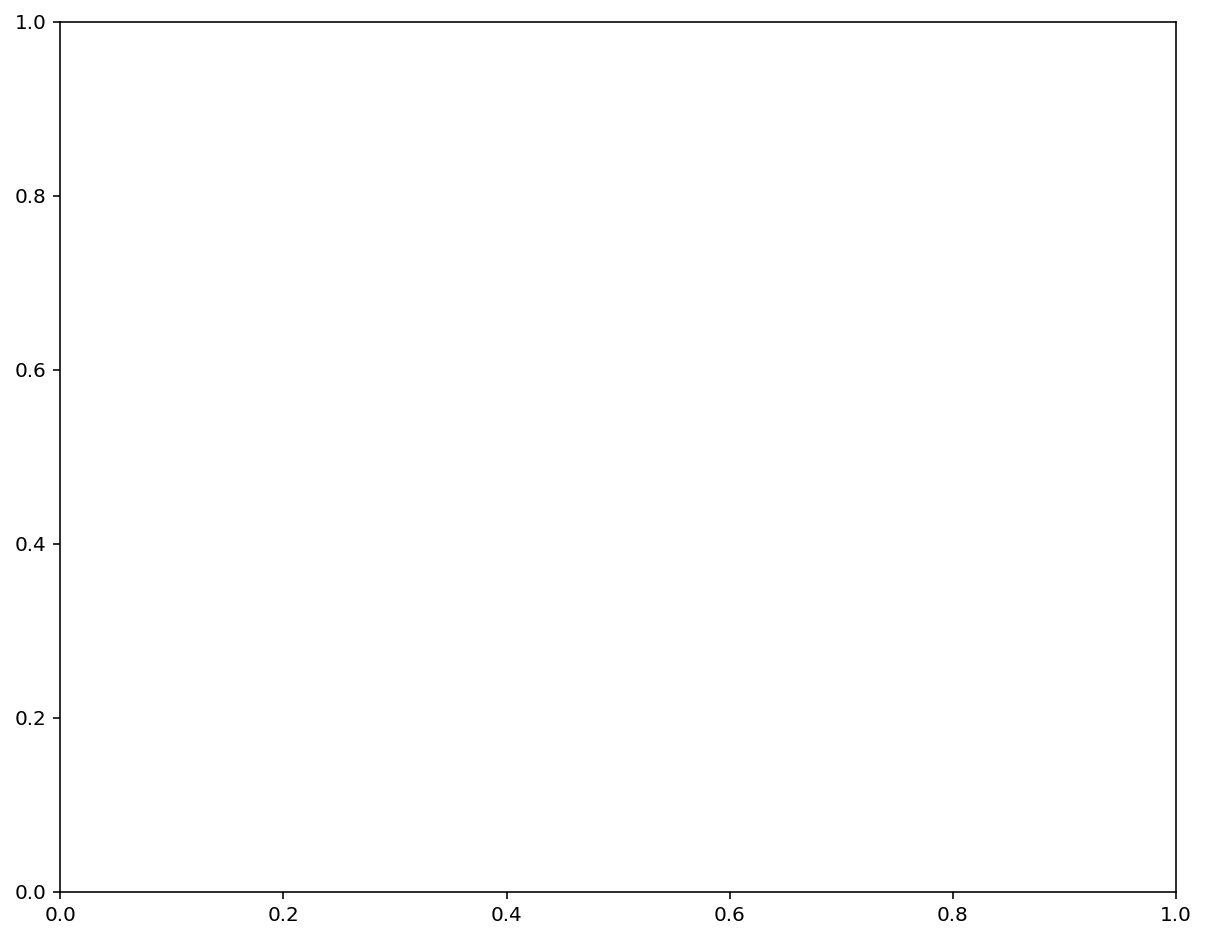

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))

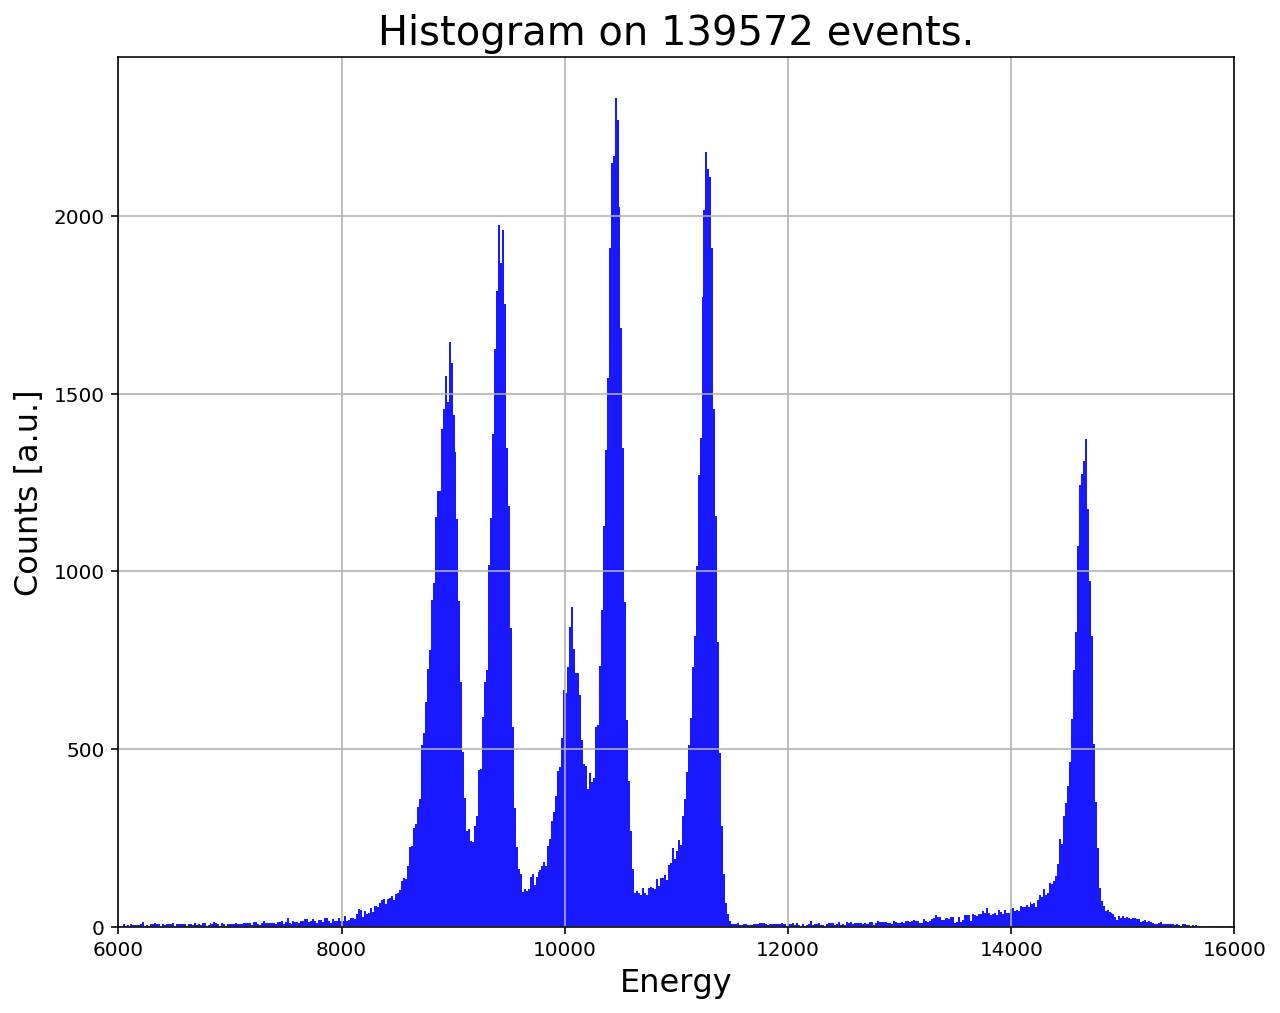

In [31]:
frag_df.hist('Energy', bins=1000, alpha=0.9, ax=ax, fc='b')
ax.set_xlim(0.6e4,1.6e4)
ax.set_xlabel("Energy", fontsize=16)
ax.set_ylabel("Counts [a.u.]", fontsize=16)
ax.set_title(f"Histogram on {size} events.", fontsize=20)
fig

In [32]:
hist, bin_edges = np.histogram(frag_df['Energy'], bins=1000)

In [44]:
bin_edges[:-1][hist==max(hist)], max(hist)

(array([10445.95]), 2332)

In [45]:
frag_df[frag_df['Energy'] == 10445]

,Timestamp,Coarse Time,Energy,Trace Length,Crate ID,Slot ID,Channel ID,Time High,Time Low,Time CFD,Finish Code,Channel Length,Channel Header Length,Overflow Code,CFD Trig Source Bit,CFD Fail Bit,ADC Frequency,Hardware Revision,ADC Resolution,ADC Over/Underflow
Event ID,,,,,,,,,,,,,,,,,,,,
211,9.544372e+09,9544372300,10445,1000,1,2,0,0,954437230,0,0,504,4,0,0,0,500,15,14,0
271,1.206789e+10,12067894950,10445,1000,1,2,0,0,1206789495,0,0,504,4,0,0,0,500,15,14,0
1479,6.331765e+10,63317646120,10445,1000,1,2,0,1,2036797316,0,0,504,4,0,0,0,500,15,14,0
1658,7.054948e+10,70549482440,10445,1000,1,2,0,1,-1534986348,0,0,504,4,0,0,0,500,15,14,0
3373,1.436463e+11,143646340950,10445,1000,1,2,0,3,1479732207,0,0,504,4,0,0,0,500,15,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133106,5.584968e+12,5584968216830,10445,1000,1,2,0,130,151073203,0,0,504,4,0,0,0,500,15,14,0
133150,5.586821e+12,5586820932280,10445,1000,1,2,0,130,336344748,0,0,504,4,0,0,0,500,15,14,0
133203,5.588904e+12,5588903905770,10445,1000,1,2,0,130,544642097,0,0,504,4,0,0,0,500,15,14,0


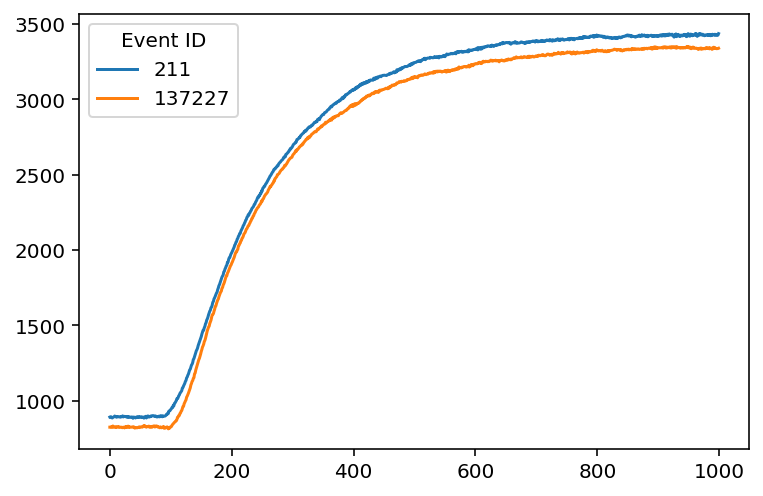

In [47]:
trace_df_t.plot(y=[211,137227])